In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Windows\Downloads\cover_type (1) (1).csv")  

# Display basic info
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Shape of the dataset: (145890, 55)

First 5 rows:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235    

In [2]:
# Dataset shape and structure
print("Dataset shape:", df.shape)
print("\nColumn info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Class distribution of target variable
print("\nCover_Type class distribution:")
print(df['Cover_Type'].value_counts())

Dataset shape: (145890, 55)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-nul

In [3]:
# Check again for missing values
print("Missing values:\n", df.isnull().sum())

# If any, fill numerical columns with median (robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values:
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11           

In [4]:
from scipy.stats import zscore
import numpy as np

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Z-score and cap outliers
for col in num_cols:
    z_scores = zscore(df[col])
    df[col] = np.where(z_scores > 3, df[col].mean(), df[col])
    df[col] = np.where(z_scores < -3, df[col].mean(), df[col])

In [5]:
from scipy.stats import skew

# Check skewness
skewed_cols = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkewed columns:\n", skewed_cols[skewed_cols > 1])

# Apply log1p to highly skewed columns
for col in skewed_cols[skewed_cols > 1].index:
    df[col] = np.log1p(df[col])


Skewed columns:
 Soil_Type_25                      381.951568
Soil_Type_28                      127.306716
Soil_Type_36                      120.772514
Soil_Type_27                       98.605274
Soil_Type_21                       95.473164
Soil_Type_34                       81.414764
Soil_Type_37                       65.481926
Soil_Type_26                       51.948696
Soil_Type_35                       37.779556
Soil_Type_7                        37.234786
Soil_Type_5                        29.684726
Soil_Type_14                       29.330114
Soil_Type_8                        28.496125
Soil_Type_31                       20.890907
Soil_Type_1                        20.198024
Soil_Type_11                       18.876911
Soil_Type_13                       17.421104
Wilderness_Area_2                  17.010825
Soil_Type_17                       15.342313
Soil_Type_33                       15.291784
Soil_Type_2                        15.204527
Soil_Type_6                        14

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
import numpy as np

# Step 1: Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Impute NaNs with median (robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 3: Convert all columns to float32 safely
df = df.astype(np.float32, errors='ignore')

In [7]:
# Derived feature: Total distance to hydrology
df['Total_Distance_To_Hydrology'] = df['Horizontal_Distance_To_Hydrology'] + df['Vertical_Distance_To_Hydrology']

# Derived feature: Shade difference
df['Hillshade_Diff_Morning_Evening'] = df['Hillshade_9am'] - df['Hillshade_3pm']

In [8]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Encode the target variable
le = LabelEncoder()
df['Cover_Type'] = le.fit_transform(df['Cover_Type'])

# Save the encoder for deployment
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

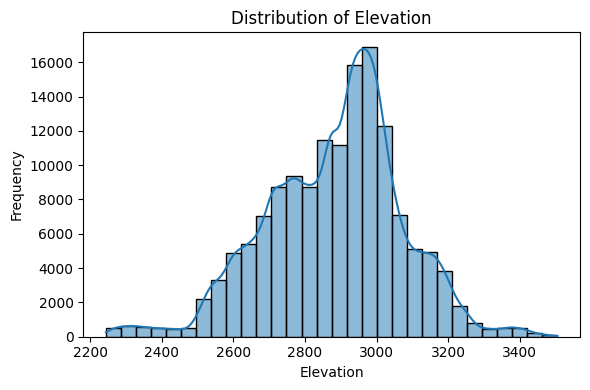

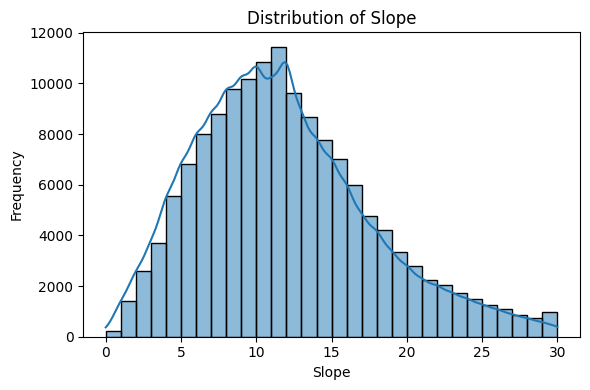

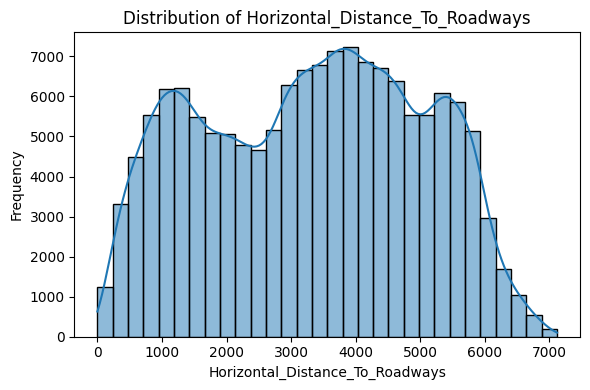

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample numerical columns
num_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways']

# Histograms
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

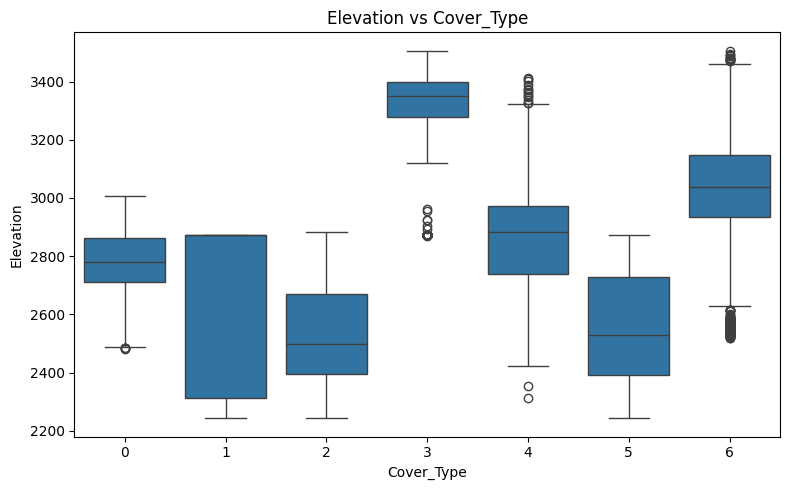

In [10]:
# Boxplot for Elevation vs Cover_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation vs Cover_Type')
plt.xlabel('Cover_Type')
plt.ylabel('Elevation')
plt.tight_layout()
plt.show()

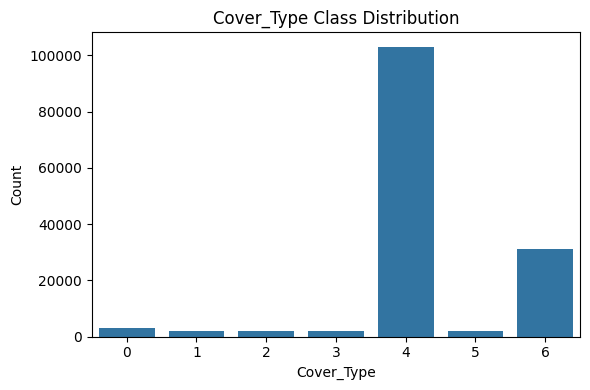

In [11]:
# Class distribution barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Cover_Type', data=df)
plt.title('Cover_Type Class Distribution')
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

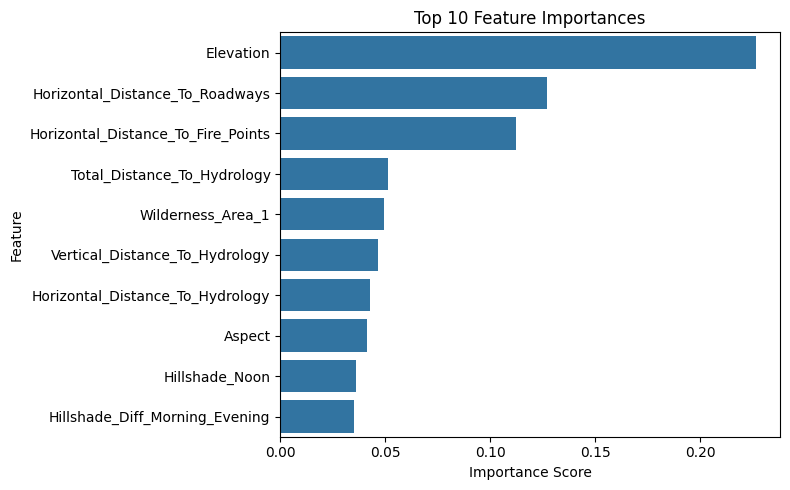

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit baseline model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Apply only on training data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check new class distribution
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({4: 82362, 6: 24891, 0: 2489, 5: 1758, 3: 1755, 1: 1737, 2: 1720})
Resampled class distribution: Counter({4: 82362, 6: 82362, 1: 82362, 5: 82362, 2: 82362, 0: 82362, 3: 82362})


In [14]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and display top 20
top_features = importances.sort_values(ascending=False).head(20)
print("Top 20 important features:\n", top_features)

Top 20 important features:
 Elevation                             0.226724
Horizontal_Distance_To_Roadways       0.127211
Horizontal_Distance_To_Fire_Points    0.112072
Total_Distance_To_Hydrology           0.051216
Wilderness_Area_1                     0.049234
Vertical_Distance_To_Hydrology        0.046743
Horizontal_Distance_To_Hydrology      0.042874
Aspect                                0.041358
Hillshade_Noon                        0.036230
Hillshade_Diff_Morning_Evening        0.035225
Hillshade_3pm                         0.034235
Hillshade_9am                         0.033589
Slope                                 0.027800
Wilderness_Area_4                     0.025510
Wilderness_Area_3                     0.018688
Soil_Type_12                          0.013844
Soil_Type_23                          0.008905
Soil_Type_10                          0.008724
Soil_Type_29                          0.007222
Soil_Type_30                          0.005797
dtype: float64


In [15]:
# Select top 30 features
selected_features = importances.sort_values(ascending=False).head(30).index.tolist()

# Reduce feature set
X_train_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Dictionary to store models and results
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_selected, y_resampled)
    y_pred = model.predict(X_test_selected)
    
    print(f"\n🔍 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


🔍 Random Forest Results:
Accuracy: 0.9520871889779972
Confusion Matrix:
 [[  495     0     6     0    71     6     2]
 [    0   407     7     0     0     9     0]
 [    3    12   380     0     1    44     0]
 [    0     0     0   387     2     0    16]
 [   42     0    11     5 20196    12   443]
 [    7    23    49     0     4   319     0]
 [    9     0     2    33   579     0  5596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       580
           1       0.92      0.96      0.94       423
           2       0.84      0.86      0.85       440
           3       0.91      0.96      0.93       405
           4       0.97      0.98      0.97     20709
           5       0.82      0.79      0.81       402
           6       0.92      0.90      0.91      6219

    accuracy                           0.95     29178
   macro avg       0.90      0.90      0.90     29178
weighted avg       0.95      0.95      0.95 

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔍 Logistic Regression Results:
Accuracy: 0.45472616354787854
Confusion Matrix:
 [[ 232  105   59    2  100   56   26]
 [  19  260   28    8    0  108    0]
 [  63   91  134   25    8  119    0]
 [  21    0    1  348    3    0   32]
 [3868  926  333  495 8420  747 5920]
 [  28   90   88   21    9  166    0]
 [ 492   79   21  765 1139   15 3708]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.40      0.09       580
           1       0.17      0.61      0.26       423
           2       0.20      0.30      0.24       440
           3       0.21      0.86      0.34       405
           4       0.87      0.41      0.55     20709
           5       0.14      0.41      0.21       402
           6       0.38      0.60      0.47      6219

    accuracy                           0.45     29178
   macro avg       0.29      0.51      0.31     29178
weighted avg       0.71      0.45      0.51     29178


🔍 KNN Results:
Accuracy: 0.946

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:16:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Results:
Accuracy: 0.9131194735759819
Confusion Matrix:
 [[  550     0     4     0    17     9     0]
 [    0   408     5     0     0    10     0]
 [    2     8   371     0     0    59     0]
 [    0     0     0   396     0     0     9]
 [  223     0    17     6 18895    17  1551]
 [   11    18    49     0     1   323     0]
 [   18     0     6    46   449     0  5700]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79       580
           1       0.94      0.96      0.95       423
           2       0.82      0.84      0.83       440
           3       0.88      0.98      0.93       405
           4       0.98      0.91      0.94     20709
           5       0.77      0.80      0.79       402
           6       0.79      0.92      0.85      6219

    accuracy                           0.91     29178
   macro avg       0.84      0.91      0.87     29178
weighted avg       0.92      0.91      0.92     29

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized search with 10 iterations and 3-fold CV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy',
                                   n_jobs=-1, verbose=1, random_state=42)

# Fit on resampled training data
random_search.fit(X_train_selected, y_resampled)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Best Accuracy Score: 0.9922502402286769


In [18]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Step 1: Select top 30 features based on importances
selected_features = importances.sort_values(ascending=False).head(30).index.tolist()

# Step 2: Reduce feature set
X_train_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Step 3: Train Final Model with Best Parameters
final_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

final_model.fit(X_train_selected, y_resampled)

# Step 4: Save both model and selected feature list
joblib.dump(final_model, 'best_forest_cover_model.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

print("✅ Model and selected features saved successfully!")

✅ Model and selected features saved successfully!


In [19]:
import pandas as pd

# Assume your dataset is already loaded as df
# and has the same feature names used in training
# plus the target column "Cover_Type"

# Select a few rows for testing
sample_df = df[selected_features + ["Cover_Type"]].head(20)

# Save to CSV
sample_df.to_csv("test_samples.csv", index=False)

print("✅ Test CSV saved as test_samples.csv")

✅ Test CSV saved as test_samples.csv
